In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv('data.csv', delimiter=',')
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,0,0.000000,39,0,0.055916,4166.0,5,0,0,0,0.0
1346,1347,0,0.045694,49,0,0.300175,4000.0,14,0,1,0,1.0
1347,1348,0,0.022780,53,0,0.323068,10000.0,14,0,2,0,1.0
1348,1349,0,0.036934,56,0,0.287935,8362.0,8,0,1,0,2.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    1350 non-null   int64  
 1   SeriousDlqin2yrs                      1350 non-null   int64  
 2   RevolvingUtilizationOfUnsecuredLines  1350 non-null   float64
 3   age                                   1350 non-null   int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  1350 non-null   int64  
 5   DebtRatio                             1350 non-null   float64
 6   MonthlyIncome                         1094 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       1350 non-null   int64  
 8   NumberOfTimes90DaysLate               1350 non-null   int64  
 9   NumberRealEstateLoansOrLines          1350 non-null   int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  1350 non-null   int64  
 11  NumberOfDependent

In [21]:
df['SeriousDlqin2yrs'].mean()

0.06

In [22]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

In [23]:
df.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1307.000000
mean,675.500000,0.060000,3.577895,52.048889,0.257778,356.123363,6438.473492,8.434074,0.080000,0.986667,0.062222,0.737567
std,389.855743,0.237575,84.914699,15.009875,0.751718,1156.603074,7065.781288,5.129287,0.376634,1.008401,0.306555,1.086949
min,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,338.250000,0.000000,0.031140,40.000000,0.000000,0.175125,3724.250000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,675.500000,0.000000,0.156891,52.000000,0.000000,0.367049,6400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,1012.750000,0.000000,0.543145,63.000000,0.000000,0.807001,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1350.000000,1.000000,2340.000000,97.000000,10.000000,15466.000000,208333.000000,31.000000,5.000000,8.000000,5.000000,8.000000


array([[<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='SeriousDlqin2yrs'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='SeriousDlqin2yrs'>,
        <AxesSubplot:xlabel='DebtRatio', ylabel='SeriousDlqin2yrs'>],
       [<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='DebtRatio', ylabel='MonthlyIncome'>],
       [<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='DebtRatio'>,
        <AxesSubplot:xlabel='DebtRatio', ylabel='DebtRatio'>]],
      dtype=object)

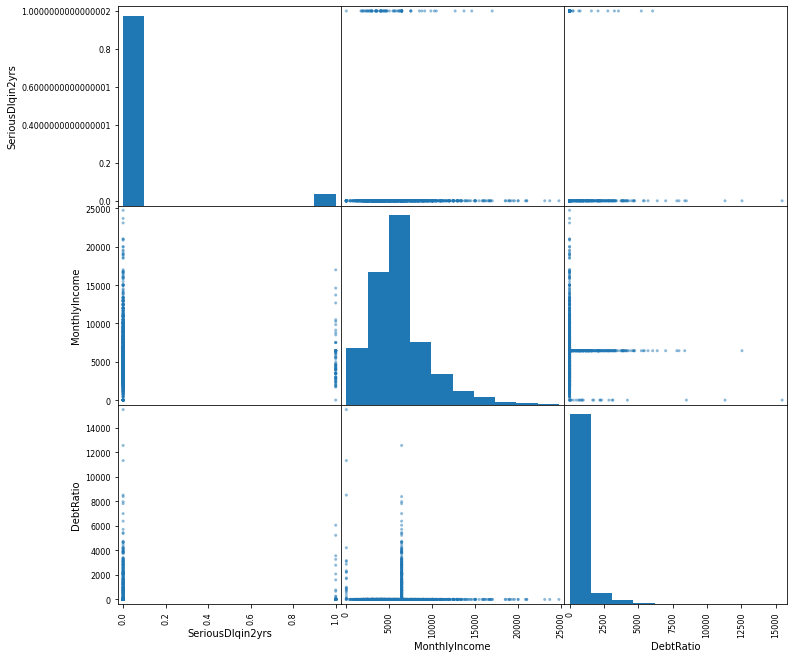

In [24]:
df1 = df[['SeriousDlqin2yrs', 'MonthlyIncome', 'DebtRatio']]
pd.plotting.scatter_matrix(df1[df1['MonthlyIncome']<25000],figsize=(12,11))

In [25]:
def dist(x1, x2):
    x1 = np.array(x1) 
    x2 = np.array(x2)
#     print('check')
    
    return np.linalg.norm(x1 - x2)

In [26]:
def get_neighbors(df, y, x, k):
    distances = []
#     print('ch')
    for index in range(len(y)):
        distan = dist(x, df.iloc[[index]])
        distances.append((index, distan, y[index]))
    distances.sort(key=lambda n: n[1])
    neighbors = distances[:k]
    return neighbors

In [27]:
def check(neighbors):
    y0 = 0
    y1 = 0
    for neighbor in neighbors:
        if neighbor[2] == 0:
            y0 += 1
        else:
            y1 += 1
    if y0 > y1:
        return 0
    else:
        return 1

In [28]:
X_train = df[['age', 'MonthlyIncome']]
y_train = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

1080 270 1080 270


In [29]:
type(X_test.iloc[[12]])

pandas.core.frame.DataFrame

In [30]:
y_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    neighbors = get_neighbors(X_train, y_train, X_test.iloc[[i]], 2)
    y_pred[i] = check(neighbors)
#     print("index: ", i, 
#           ", result of check: ", check(neighbors), 
#           ", true label: ", y_test[i])

In [31]:
count = np.count_nonzero(y_pred - y_test)
print(1-count/len(y_pred))

0.9296296296296296


In [32]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_pred
len(X_tmp[X_tmp['labels']==0]['MonthlyIncome'])

270

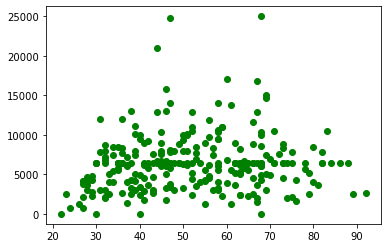

In [34]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_pred

plt.scatter(X_tmp[X_tmp['labels']==0]['age'], X_tmp[X_tmp['labels']==0]['MonthlyIncome'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['age'], X_tmp[X_tmp['labels']==1]['MonthlyIncome'], c='b')

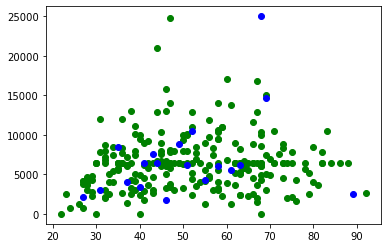

In [35]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_test

plt.scatter(X_tmp[X_tmp['labels']==0]['age'], X_tmp[X_tmp['labels']==0]['MonthlyIncome'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['age'], X_tmp[X_tmp['labels']==1]['MonthlyIncome'], c='b')

In [36]:
X_train = df[['MonthlyIncome', 'DebtRatio']]
y_train = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

1080 270 1080 270


In [37]:
y_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    neighbors = get_neighbors(X_train, y_train, X_test.iloc[[i]], 2)
    y_pred[i] = check(neighbors)
#     print("index: ", i, 
#           ", result of check: ", check(neighbors), 
#           ", true label: ", y_test[i])

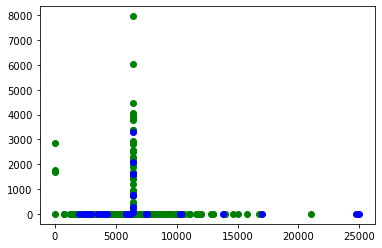

In [39]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_pred

plt.scatter(X_tmp[X_tmp['labels']==0]['MonthlyIncome'], X_tmp[X_tmp['labels']==0]['DebtRatio'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['MonthlyIncome'], X_tmp[X_tmp['labels']==1]['DebtRatio'], c='b')

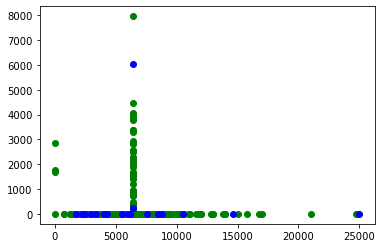

In [40]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_test

plt.scatter(X_tmp[X_tmp['labels']==0]['MonthlyIncome'], X_tmp[X_tmp['labels']==0]['DebtRatio'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['MonthlyIncome'], X_tmp[X_tmp['labels']==1]['DebtRatio'], c='b')

In [41]:
X_train = df[['NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents']]
y_train = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

1080 270 1080 270


In [42]:
y_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    neighbors = get_neighbors(X_train, y_train, X_test.iloc[[i]], 2)
    y_pred[i] = check(neighbors)
#     print("index: ", i, 
#           ", result of check: ", check(neighbors), 
#           ", true label: ", y_test[i])

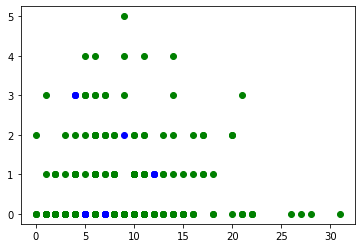

In [43]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_pred

plt.scatter(X_tmp[X_tmp['labels']==0]['NumberOfOpenCreditLinesAndLoans'], X_tmp[X_tmp['labels']==0]['NumberOfDependents'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['NumberOfOpenCreditLinesAndLoans'], X_tmp[X_tmp['labels']==1]['NumberOfDependents'], c='b')

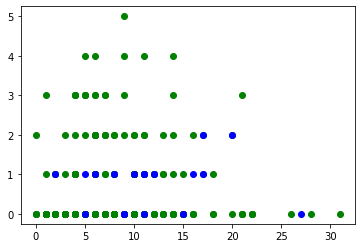

In [44]:
X_tmp = X_test.copy()
X_tmp['labels'] = y_test

plt.scatter(X_tmp[X_tmp['labels']==0]['NumberOfOpenCreditLinesAndLoans'], X_tmp[X_tmp['labels']==0]['NumberOfDependents'], c='g')
plt.scatter(X_tmp[X_tmp['labels']==1]['NumberOfOpenCreditLinesAndLoans'], X_tmp[X_tmp['labels']==1]['NumberOfDependents'], c='b')